In [19]:
import librosa

import matplotlib.pyplot as plt


import librosa.display

In [20]:
import numpy as np
import pandas as pd

In [21]:
import os
myfolder = '/home/andrewcgaitskell/Downloads/audio/'
contents = os.listdir(myfolder)
contents

['myWave.wav',
 '2021-08-03T17:30:35.452265+00:00_2021-08-03T17:30:46.204300+00:00.bytes',
 '2021-08-03T17:30:24.670322+00:00_2021-08-03T17:30:35.451971+00:00.bytes']

In [22]:
myfolder = '/home/andrewcgaitskell/Downloads/audio/'
#myfile = '2021-07-27T14:45:35.015312+00:00.bytes'
myfile = '2021-08-03T17:30:24.670322+00:00_2021-08-03T17:30:35.451971+00:00.bytes'
myfullfile = myfolder + myfile
bytes_df = pd.DataFrame()
bytes_list = []
with open(myfullfile, "rb") as f:
    while (byte_val := f.read(2)):
        # Do stuff with byte.
        ##print(byte)
        int_val = int.from_bytes(byte_val, "big")
        bytes_list.append(int_val)
        # printing int equivalent
        #print(int_val)
bytes_df = pd.DataFrame(bytes_list, columns = ['Value'])
bytes_df['Value'].max()
# max = 27666
# min = 24800
# range = 2866

27666

In [23]:
with open(myfullfile, "rb") as f:
    mybytes = f.read()
newarray = np.frombuffer(mybytes, dtype='>i2', count=-1)
newarray

array([26352, 26367, 26319, ..., 26319, 26174, 26124], dtype=int16)

In [24]:
myfolder = '/home/andrewcgaitskell/Downloads/audio/'
#myfile = '2021-07-27T14:45:35.015312+00:00.bytes'
myfile = 'myWave.wav'
myfullfile = myfolder + myfile
y, sr = librosa.load(myfullfile,sr=44000)

In [25]:
y

array([ 0.00018983,  0.01405491,  0.02872976, ..., -0.02875865,
       -0.01409333, -0.00020602], dtype=float32)

In [26]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


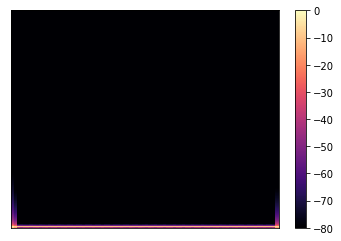

In [27]:
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()